In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier, RandomForestClassifier,BaggingClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix, precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<AxesSubplot:xlabel='sex', ylabel='count'>

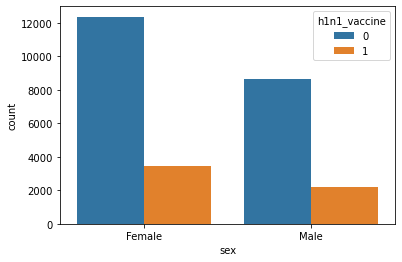

In [6]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=df)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

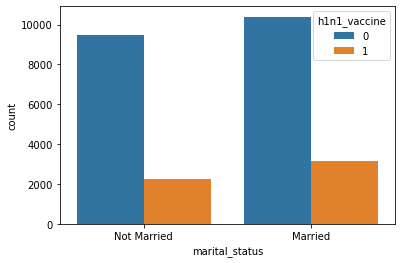

In [7]:
sns.countplot(x="marital_status",hue="h1n1_vaccine",data=df)

AxesSubplot(0.125,0.125;0.775x0.755)


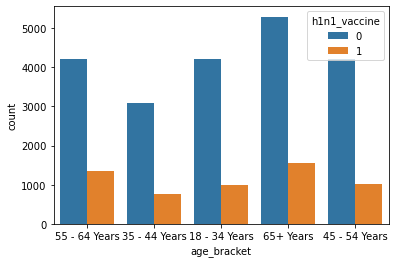

In [23]:
print(sns.countplot(x = 'age_bracket' , hue = 'h1n1_vaccine' , data = df))

AxesSubplot(0.125,0.125;0.775x0.755)


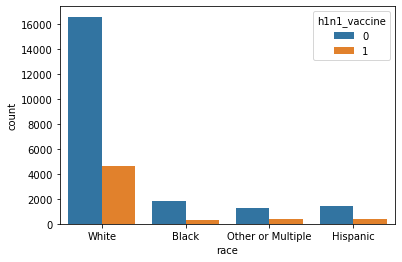

In [24]:
print(sns.countplot(x = 'race' , hue = 'h1n1_vaccine' , data = df))

AxesSubplot(0.125,0.125;0.775x0.755)


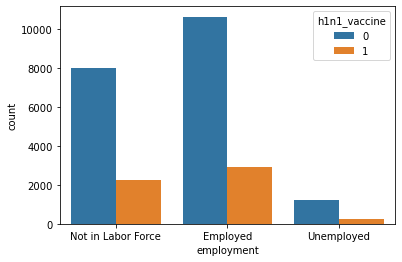

In [25]:
print(sns.countplot(x = 'employment' , hue = 'h1n1_vaccine' , data = df))

In [8]:
correlation_mat=df.corr()

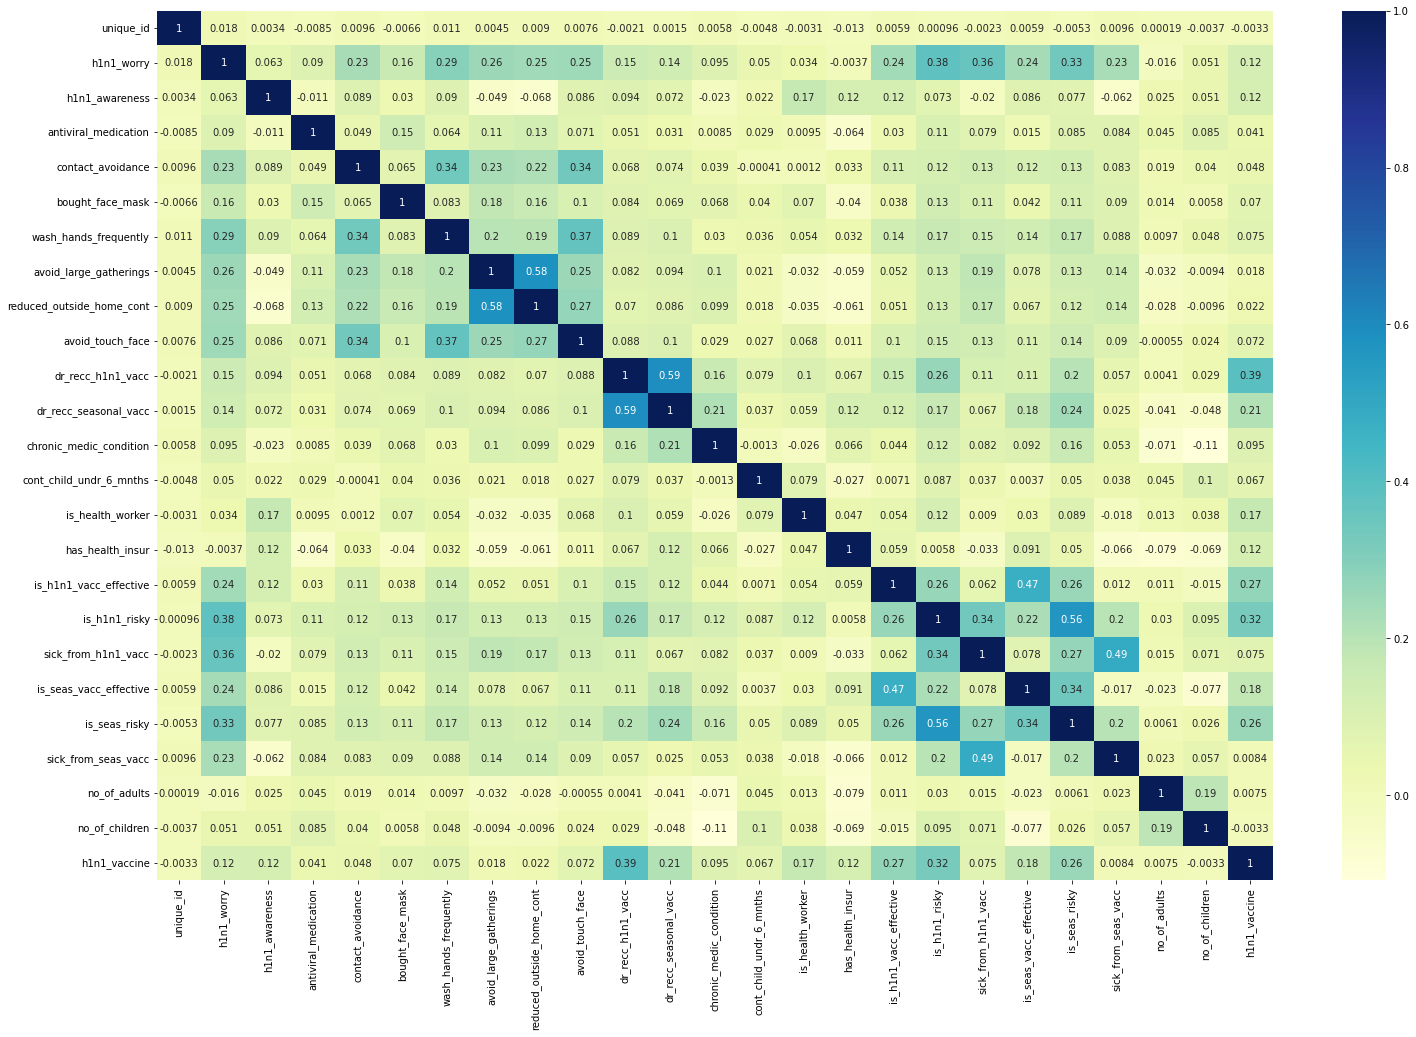

In [9]:
plt.figure(figsize=(25,16))
sns.heatmap(correlation_mat,annot=True,cmap="YlGnBu")
plt.show()

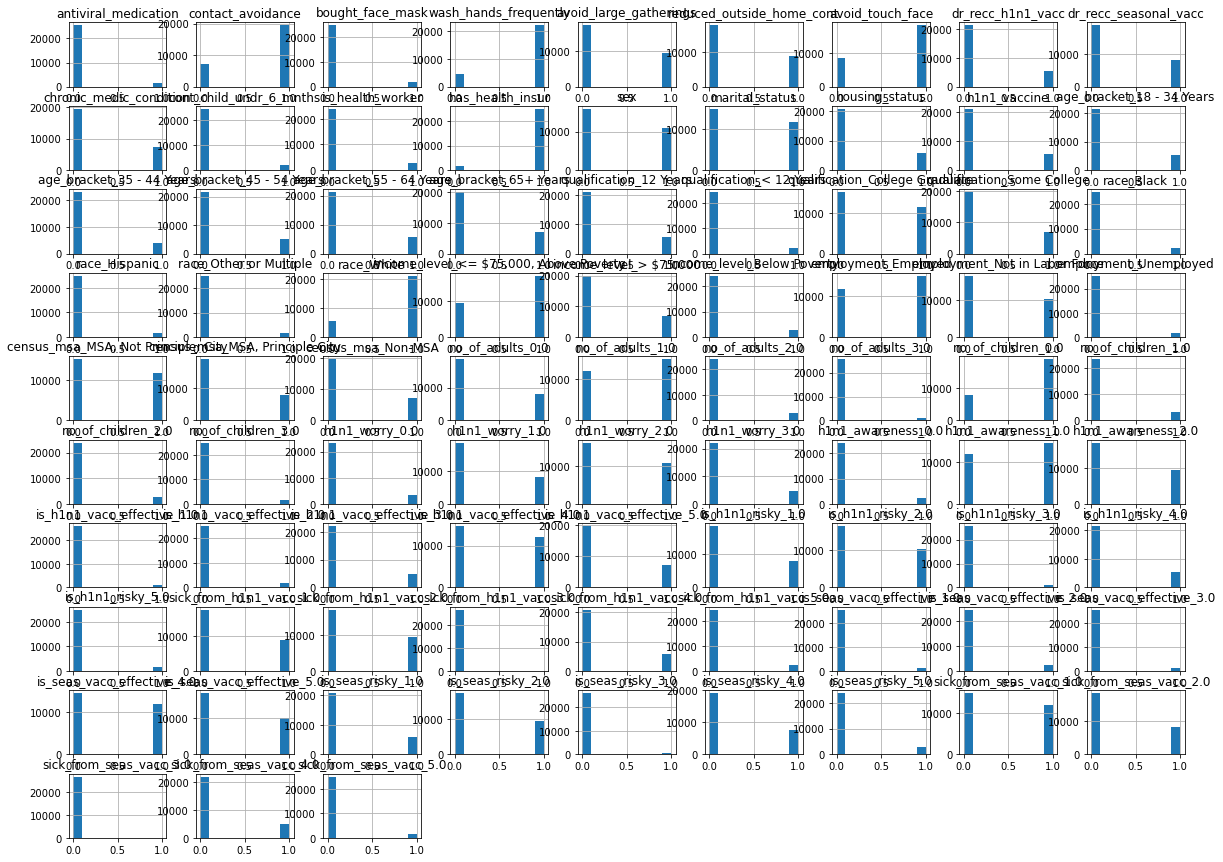

In [45]:
df.hist(figsize=(20,15))
plt.show()

In [11]:
#find the missing values
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [12]:
df.shape

(26707, 34)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [15]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [16]:
df['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [17]:
print(df['sex'].value_counts())
print(df['income_level'].value_counts())
print(df['marital_status'].value_counts())
print(df['housing_status'].value_counts())
print(df['employment'].value_counts())
print(df['census_msa'].value_counts())
print(df['no_of_adults'].value_counts())
print(df['no_of_children'].value_counts())
print(df['h1n1_vaccine'].value_counts())

Female    15858
Male      10849
Name: sex, dtype: int64
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64
Married        13555
Not Married    11744
Name: marital_status, dtype: int64
Own     18736
Rent     5929
Name: housing_status, dtype: int64
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64
1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64
0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64


In [18]:
df.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [19]:
df.sample(10).T

,5003,373,23760,13183,26657,24691,25569,14312,8854,12105
unique_id,5003,373,23760,13183,26657,24691,25569,14312,8854,12105
h1n1_worry,2.0,1.0,1.0,1.0,3.0,2.0,1.0,0.0,2.0,1.0
h1n1_awareness,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
antiviral_medication,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
contact_avoidance,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
bought_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wash_hands_frequently,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
avoid_large_gatherings,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
reduced_outside_home_cont,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
avoid_touch_face,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


<AxesSubplot:>

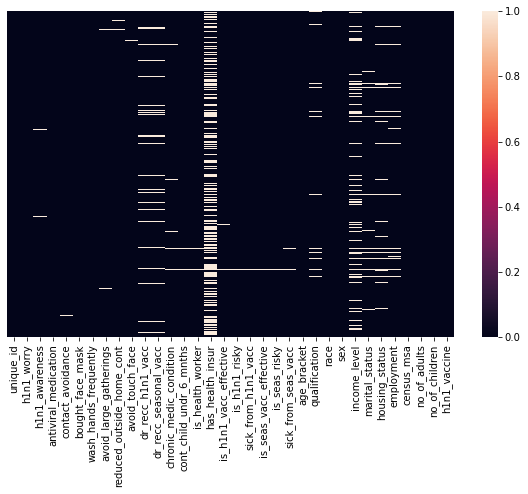

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [21]:
df['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [22]:
df['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [26]:
df=df.drop('unique_id', axis=1)

In [27]:
#Filling all Nan Values with mode of respective variable
df['qualification'].fillna(df['qualification'].mode()[0],inplace=True)
df['income_level'].fillna(df['income_level'].mode()[0],inplace=True)
df['marital_status'].fillna(df['marital_status'].mode()[0],inplace=True)
df['housing_status'].fillna(df['housing_status'].mode()[0],inplace=True)
df['employment'].fillna(df['employment'].mode()[0],inplace=True)

df['no_of_adults'].fillna(df['no_of_adults'].mode()[0],inplace=True)
df['no_of_children'].fillna(df['no_of_children'].mode()[0],inplace=True)

In [28]:
df['h1n1_worry'].fillna(df['h1n1_worry'].median(),inplace=True)
df['h1n1_awareness'].fillna(df['h1n1_awareness'].median(),inplace=True)
df['antiviral_medication'].fillna(df['antiviral_medication'].median(),inplace=True)
df['contact_avoidance'].fillna(df['contact_avoidance'].median(),inplace=True)
df['bought_face_mask'].fillna(df['bought_face_mask'].median(),inplace=True)
df['wash_hands_frequently'].fillna(df['wash_hands_frequently'].median(),inplace=True)
df['avoid_large_gatherings'].fillna(df['avoid_large_gatherings'].median(),inplace=True)
df['reduced_outside_home_cont'].fillna(df['reduced_outside_home_cont'].median(),inplace=True)
df['avoid_touch_face'].fillna(df['avoid_touch_face'].median(),inplace=True)
df['dr_recc_h1n1_vacc'].fillna(df['dr_recc_h1n1_vacc'].median(),inplace=True)
df['dr_recc_seasonal_vacc'].fillna(df['dr_recc_seasonal_vacc'].median(),inplace=True)
df['chronic_medic_condition'].fillna(df['chronic_medic_condition'].median(),inplace=True)
df['cont_child_undr_6_mnths'].fillna(df['cont_child_undr_6_mnths'].median(),inplace=True)

df['has_health_insur'].fillna(df['has_health_insur'].median(),inplace=True)
df['is_h1n1_vacc_effective'].fillna(df['is_h1n1_vacc_effective'].median(),inplace=True)
df['is_h1n1_risky'].fillna(df['is_h1n1_risky'].median(),inplace=True)
df['sick_from_h1n1_vacc'].fillna(df['sick_from_h1n1_vacc'].median(),inplace=True)
df['is_seas_vacc_effective'].fillna(df['is_seas_vacc_effective'].median(),inplace=True)
df['is_seas_risky'].fillna(df['is_seas_risky'].median(),inplace=True)
df['sick_from_seas_vacc'].fillna(df['sick_from_seas_vacc'].median(),inplace=True)

In [29]:
df['is_health_worker'].fillna(df['is_health_worker'].median(),inplace=True)


In [30]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

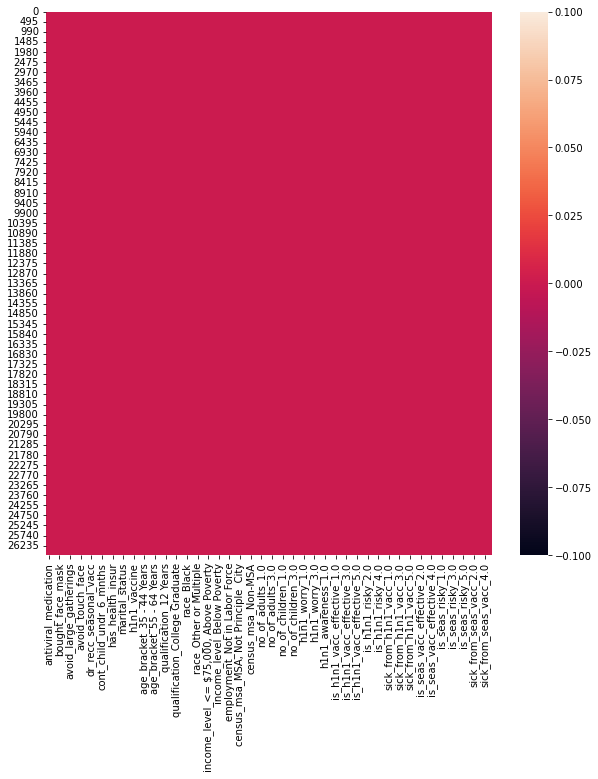

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

In [31]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [32]:

df=pd.get_dummies(df,columns=['age_bracket'])

In [33]:
df=pd.get_dummies(df,columns=['qualification'])
df=pd.get_dummies(df,columns=['race'])

df=pd.get_dummies(df,columns=['income_level'])
df=pd.get_dummies(df,columns=['employment'])
df=pd.get_dummies(df,columns=['census_msa'])
df=pd.get_dummies(df,columns=['no_of_adults'])
df=pd.get_dummies(df,columns=['no_of_children'])

In [34]:
df['marital_status'] = le.fit_transform(df['marital_status'])
df['housing_status'] = le.fit_transform(df['housing_status'])
df['sex'] = le.fit_transform(df['sex'])

In [35]:

df.dtypes

h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
has_health_insur                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64
is_seas_risky                             float64


In [36]:
df.sample(50).T

,9751,4646,9855,18259,14462,8997,993,18781,15727,25030,...,23208,26314,3157,9820,14471,9528,23646,26419,5442,19835
h1n1_worry,2.0,2.0,1.0,2.0,1.0,0.0,0.0,3.0,3.0,2.0,...,3.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0
h1n1_awareness,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,...,2.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,1.0
antiviral_medication,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
contact_avoidance,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
bought_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wash_hands_frequently,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
avoid_large_gatherings,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
reduced_outside_home_cont,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
avoid_touch_face,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
dr_recc_h1n1_vacc,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [37]:
df=pd.get_dummies(df,columns=['h1n1_worry'])
df=pd.get_dummies(df,columns=['h1n1_awareness'])
df=pd.get_dummies(df,columns=['is_h1n1_vacc_effective'])
df=pd.get_dummies(df,columns=['is_h1n1_risky'])
df=pd.get_dummies(df,columns=['sick_from_h1n1_vacc'])
df=pd.get_dummies(df,columns=['is_seas_vacc_effective'])
df=pd.get_dummies(df,columns=['is_seas_risky'])
df=pd.get_dummies(df,columns=['sick_from_seas_vacc'])

In [38]:
df.dtypes

antiviral_medication       float64
contact_avoidance          float64
bought_face_mask           float64
wash_hands_frequently      float64
avoid_large_gatherings     float64
                            ...   
sick_from_seas_vacc_1.0      uint8
sick_from_seas_vacc_2.0      uint8
sick_from_seas_vacc_3.0      uint8
sick_from_seas_vacc_4.0      uint8
sick_from_seas_vacc_5.0      uint8
Length: 84, dtype: object

antiviral_medication float64 contact_avoidance float64 bought_face_mask float64 wash_hands_frequently float64 avoid_large_gatherings float64 reduced_outside_home_cont float64 avoid_touch_face float64 dr_recc_h1n1_vacc float64 dr_recc_seasonal_vacc float64 chronic_medic_condition float64 cont_child_undr_6_mnths float64 is_health_worker float64 has_health_insur

In [39]:
df['has_health_insur'].value_counts()


1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

# Splitting data 

In [46]:
### Step 4:x,y-->train data test data->Fit the model with training data  predict with the test data


In [48]:
# All the independent varibles
x=df.drop(["h1n1_vaccine"],axis=1)

#Dependent varible
y=df["h1n1_vaccine"]

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2,random_state=1)

# Logistic Regression

In [50]:
lrc = LogisticRegression()
lrc.fit(X_train,Y_train)


LogisticRegression()

In [51]:
print(lrc.score(X_train,Y_train))
print(lrc.score(X_test,Y_test))

0.8357126140884624
0.842755522276301


Test score of Logistic Regression 0.842755522276301


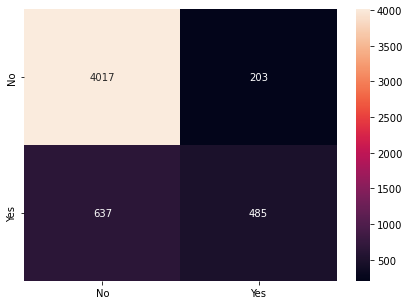

In [52]:
y_predict1 = lrc.predict(X_test)
print(f"Test score of Logistic Regression {lrc.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict1,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

# Decision Tree

In [53]:
d_tree=DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [54]:
print(d_tree.score(X_train,Y_train))  ##overfitting
print(d_tree.score(X_test,Y_test))


0.9999531944769483
0.749906402096593


In [55]:
d_treeR=DecisionTreeClassifier(max_depth=9)
d_treeR.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=9)

In [56]:
print(d_treeR.score(X_train,Y_train))
print(d_treeR.score(X_test,Y_test))


0.857523987830564
0.8292774241856983


Test score of Decision tree 0.8292774241856983


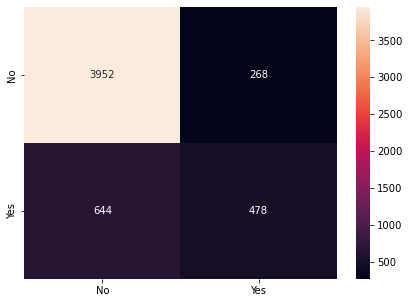

In [57]:
y_predict2 = d_treeR.predict(X_test)
print(f"Test score of Decision tree {d_treeR.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict2,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

# Gradient Boosting Classifier

In [58]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [59]:
print(gbc.score(X_train,Y_train))
print(gbc.score(X_test,Y_test))

0.841469693423824
0.8448146761512542


Test score of Gradient Boosting Classifier 0.8448146761512542


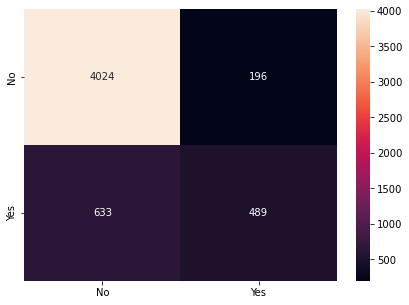

In [60]:
y_predict3 = gbc.predict(X_test)
print(f"Test score of Gradient Boosting Classifier {gbc.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict3,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


# AdaBoost Classifier

In [61]:
adc=AdaBoostClassifier()
adc.fit(X_train,Y_train)


AdaBoostClassifier()

In [62]:
print(adc.score(X_train,Y_train))
print(adc.score(X_test,Y_test))

0.8338871986894454
0.842755522276301


Test score of AdaBoost Classifier 0.842755522276301


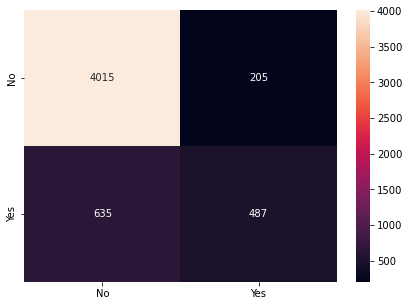

In [63]:
y_predict4 = adc.predict(X_test)
print(f"Test score of AdaBoost Classifier {adc.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict4,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

# Random Forest Classifier

In [64]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [65]:
print(rfc.score(X_train,Y_train))
print(rfc.score(X_test,Y_test))

0.9999063889538966
0.8352676900037439


In [70]:
rfcR=RandomForestClassifier(max_depth=7)
rfcR.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7)

In [71]:
print(rfcR.score(X_train,Y_train))
print(rfcR.score(X_test,Y_test))

0.8312660893985491
0.8317109696742793


Test score of Random Forest Classifier 0.8317109696742793


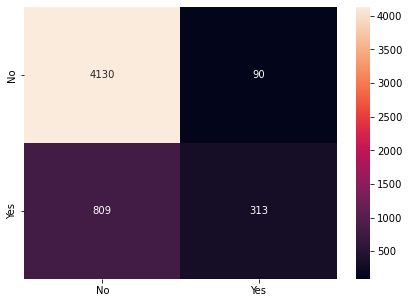

In [72]:
y_predict5 = rfcR.predict(X_test)
print(f"Test score of Random Forest Classifier {rfcR.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict5,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

# Bagging Classifier 


In [75]:
bc=BaggingClassifier()
bc.fit(X_train,Y_train)

BaggingClassifier()

In [76]:
print(bc.score(X_train,Y_train))
print(bc.score(X_test,Y_test))

0.9838989000702083
0.827218270310745


In [77]:
bcR=BaggingClassifier(base_estimator=d_treeR)
bcR.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9))

In [78]:
print(bcR.score(X_train,Y_train))
print(bcR.score(X_test,Y_test))

0.8707699508542008
0.8384500187195807


Test score of Bagging Classifier 0.8384500187195807


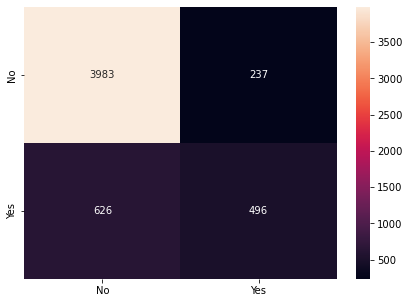

In [79]:
y_predict6 = bcR.predict(X_test)
print(f"Test score of Bagging Classifier {bcR.score(X_test, Y_test)}")
cm=confusion_matrix(Y_test, y_predict6,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

# SVC 

In [92]:
from sklearn.svm import SVC
svcl = SVC()
svcl = svcl.fit(X_train,Y_train)
y_predict = svcl.predict(X_test)
print(svcl.score(X_train,Y_train))
print(svcl.score(X_test,Y_test))

0.8634214837350808
0.8416323474354175


In [81]:
#now we try to find the accuracy and precision of all algorithms


In [82]:
def train_classifier(clf,X_train,X_test,Y_train,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    acc= accuracy_score(Y_test,Y_pred)

    precision= precision_score(Y_test,Y_pred)
    return acc,precision

In [83]:
accuracy_scores=[]
precision_scores=[]


In [97]:
clfs = {
    'DecisionTree' : d_treeR,
    'LogisticRegression' : lrc,
    'RandomForestClassifier' : rfcR,
    'AdaBoostingClassifier' : adc,
    'BaggingClassifier': bcR,
    'GradientBoostingClassifier':gbc}

In [98]:
for name,clf in clfs.items():
      
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,Y_train,Y_test)
        
    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ',current_precision)
    print("\n\n")
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  DecisionTree
Accuracy -  0.8296518157993261
Precision -  0.6391076115485564



For  LogisticRegression
Accuracy -  0.842755522276301
Precision -  0.7049418604651163



For  RandomForestClassifier
Accuracy -  0.8302134032197679
Precision -  0.7866666666666666



For  AdaBoostingClassifier
Accuracy -  0.842755522276301
Precision -  0.703757225433526



For  BaggingClassifier
Accuracy -  0.8420067390490453
Precision -  0.6925207756232687



For  GradientBoostingClassifier
Accuracy -  0.8448146761512542
Precision -  0.7138686131386861





In [ ]:
val={'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}
performance_df =pd.DataFrame(val).sort_values('Precision',ascending=False)
performance_df

In [101]:
## hence RanRandomForestClassifier gives the higher accuracy and precision than other Algorithms